## Import

In [1]:
import pandas as pd 
import numpy as np
import cufflinks as cf 
import chart_studio.plotly as py 
import seaborn as sns 
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
cf.go_offline()

## Basics

In [2]:
# create some random data
arr_1 = np.random.randn(50, 4) # 50 values with 4 columns
df_1 = pd.DataFrame(arr_1, columns=['A', 'B', 'C', 'D'])
df_1.head()

,A,B,C,D
0,0.522941,0.459800,0.519746,-0.656971
1,-0.036938,1.027893,2.467615,-1.107886
2,0.432599,-0.943470,1.407986,-0.349264
3,0.776849,-0.272063,0.170415,0.798409
4,-1.499151,0.057154,-0.927637,-0.091270


<AxesSubplot:>

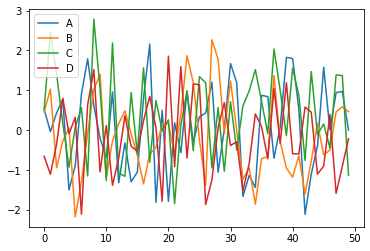

In [3]:
# plot old way
df_1.plot()

In [4]:
# using iplot
df_1.iplot()

Data is much more interactive, can zoom and zoom out, with more control, auto scale 

Can change axes. 

## Line Plots

In [5]:
import plotly.graph_objects as go 
df_stocks = px.data.stocks() # data built into plotly
px.line(df_stocks, x='date', y='GOOG', labels={'x': 'Date', 'y': 'Price'})

In [6]:
px.line(df_stocks, x='date', y=['GOOG', 'AAPL'], 
        labels={'x':'Date', 'y':'Price'}, title='Apple vs. Google')

In [7]:
# adding multiple traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, mode='lines+markers', name='Google', line=dict(color='firebrick', width=2,
                                                                                                            dash='dashdot')))

In [8]:
# further style the figure
fig.update_layout(title='Stock Price Data 2018 to 2020',
                  xaxis_title='Price', yaxis_title='Date')

In [9]:
# additional styling
fig.update_layout(
    xaxis=dict(showline=True, showgrid=True, showticklabels=True, 
               linecolor='rgb(204, 204, 204)', linewidth=2,
               ticks='outside', tickfont=dict(family='Arial', size=12, color='rgb(82, 82, 82)'),),
    
    yaxis=dict(showgrid=False, zeroline=False, showline=False, showticklabels=False)
)

## Bar Charts

In [10]:
df_us = px.data.gapminder().query('country == "United States"')
px.bar(df_us, x='year', y='pop')

In [11]:
# create stacked bar
df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex', title='Tips by Sex on Each Day', labels={'tip': 'Tip Amount', 'day':'Day of the Week'})

In [12]:
# place bars next to each other
px.bar(df_tips, x='sex', y='total_bill', color='smoker', barmode='group')

In [13]:
# display population data for countries in europe 
df_europe = px.data.gapminder().query('continent == "Europe" and year == 2007 and pop > 2.e6')
fig = px.bar(df_europe, y='pop', x='country', color='country')
fig

## Scatter Plot

In [14]:
# load iris data
df_iris = px.data.iris()

In [15]:
px.scatter(df_iris, x='sepal_width', y='sepal_length', color='species', size='petal_length', hover_data=['petal_width'])

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_iris['sepal_width'], y=df_iris['sepal_length'], mode='markers', marker_color=df_iris['sepal_width'],
                         text=df_iris.species, marker=dict(showscale=True)))

fig.update_traces(marker_line_width=2, marker_size=10)

## Histograms

In [31]:
dice_1 = np.random.randint(1,7,5000)
dice_2 = np.random.randint(1,7,5000)
dice_sum = dice_1 + dice_2

fig = px.histogram(dice_sum, nbins=11, labels={'value':'Dice Roll'},
                   title='5000 dice roll histogram', marginal='violin',
                   color_discrete_sequence=['green'])
fig

In [34]:
# style differently
fig.update_layout(xaxis_title_text='Dice Roll',
                  yaxis_title_text='Dice Sum',
                  bargap=0.2, showlegend=False)

# overlapping histograms
df_tips = px.data.tips()
px.histogram(df_tips, x='total_bill', color='sex')

In [37]:
# box plots
df_tips = px.data.tips()
px.box(df_tips, x='sex', y='tip', points='all', color='sex')

In [38]:
px.box(df_tips, x='day', y='tip', color='sex')

In [42]:
fig = go.Figure()
fig.add_trace(go.Box(x=df_tips['sex'], y=df_tips['tip'], 
                     marker_color='blue', boxmean='sd'))

In [47]:
df_stocks = px.data.stocks()
fig = go.Figure()
fig.add_trace(go.Box(y=df_stocks['GOOG'], boxpoints='all',
                     fillcolor='blue', jitter=0.5,
                     whiskerwidth=0.2))
fig.add_trace(go.Box(y=df_stocks['AAPL'], boxpoints='all',
                     fillcolor='red', jitter=0.5,
                     whiskerwidth=0.2))
fig.update_layout(title='Google vs. Apple', 
                  yaxis=dict(gridcolor='rgb(255, 255, 255)',
                             gridwidth=3),
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243,243,243)')

In [48]:
# density heatmap
flights = sns.load_dataset('flights')